1. Introduction: 

In this project I will build an initial network of agents that communicate in random dyads and replicate changes in the community over time. According to their current representations, one agent (the producer) creates one of two potential numbers variations in each encounter. The second agent (the counter) can then either continue with their current variety or adjust to the producer by altering their number. The conduct of the counter is influenced by biased "qualities": agents might be flexible (adapt to their partner) or inflexible (not adapt). This approach is repeated several times to examine what happens to the variations in the population as a whole.

I will attempt to answer the questions such as: 
* Has one of the versions spread throughout the community? 
* Is this affected by the size and initial organization of the community? 
* How many unflexible persons are required to prevent (or facilitate?) convergence?

By doing the following:

* Make Agent - creating an agent that has a number and a quality
* Make Population - creating a population of agents using the function in making agent
* Count - counting the proportion of agents with the same number in the population created when making the population
* Choose Pair - choosing two agents out of the population created in the make of population
* Interact - implementing the interaction between the two agents chosen from the above pair(s).

2. Setting the network
First, I create lists containing the possible parameters for our agents. I will create a seperate list for the possible numbers representations and possible qualities our agents can have:

In [3]:
# Setting the parameters

numbers = ['1', '2']
qualities = ['Flexible', 'Unflexible']

I also construct a basic function to generate agents. An agent is simply expressed as a two-valued list (a number and a quality).

In [5]:
def make_agent(number, quality):
    return [number, quality]

# For examaple, I can create a flexible agent with the number '1' using our function

agent_one = make_agent(numbers[1], qualities[0])
print(agent_one)

['2', 'Flexible']


Now, I can write functions that make populations of N agents (again, in the form of a list):

In [6]:
# Create a function that generates a population of N identical agents with given parameters

def make_population_identical(N):
    
    population = []
    
    for i in range(N):
        
        agent = make_agent(numbers[1], qualities[0])
        
        population.append(agent)

    return population

# Call the function to make a population of 5 identical agents

population_test = make_population_identical(5)
print(population_test)

[['2', 'Flexible'], ['2', 'Flexible'], ['2', 'Flexible'], ['2', 'Flexible'], ['2', 'Flexible']]


In [8]:
# Create a function that generates of population of N agents with randomly selected parameters from each list
# using "random.choice()"

import random

def make_population_random(N):
    
    population = []
    
    for i in range(N):
        
        a = random.choice(numbers)
        
        b = random.choice(qualities)
        
        agent = make_agent(a, b)
        
        population.append(agent)

    return population

In [9]:
# Check if it is random:
# Call the function to make a population of 5 random agents
population = make_population_random(5)
print(population)

[['2', 'Flexible'], ['2', 'Unflexible'], ['1', 'Unflexible'], ['2', 'Flexible'], ['2', 'Unflexible']]


In [10]:
# You can achieve the same goal using "random.int()" and using the index of the lists of possible parameters

def make_population(N):
    
    population = []
    
    for i in range(N):
        
        a = random.randint(0,1)
        
        b = random.randint(0,1)
        
        agent = make_agent(numbers[a], qualities[b])
        
        population.append(agent)

    return population

# Call the funtion and make a population of 50 random agents
# You can play with the numbers to make bigger or smaller populations
# pop = make_population(50)
# print(pop)

In [11]:
# Create a function that calculates the proportion of agents with the variant '1' in the population

def count(population):
    t = 0. # must be a float!     
    for agent in population:
        if agent[0] == '1':
            t += 1            # The syntax =+ means: Adds 1 to t (or: t = t + 1)
    return t / len(population)

In [12]:
# Call the funtion on a population of 50 random agents
# You can run this box multiple times to see the proportion in different populations of different sizes

prop_1 = count(make_population(50))

print('The proportion of [1] in the population is', prop_1)

The proportion of [1] in the population is 0.46


For a given population, I can now check how many agents are using each possible number variant. This is important, because later I'll also want to see how the proportion of each variant changes over the course of multiple interactions.

For this, I wrote the function above that calculates the proportion of a given number in a population.

3. Time for some interaction!

In [19]:
from numpy.random import choice

def choose_pair(population):
    i = random.randint(0, len(population) - 1) # phyton counts from 0, so pop(8) is an error
    j = random.randint(0, len(population) - 1)
    
    while i == j:
        j = random.randint(0, len(population) - 1) # make sure the same agent is not selected twice
        
    return population[i], population[j]


# And I'll test it to see that really does what we want
# You can run this box of code multiple times to make sure you are really getting random pairs

pop = make_population(8)
counter, producer = choose_pair(pop)

print('The population is', population)
print('This is the chosen pair', counter, producer)
print('The listener is', counter)
print('The producer is', producer)

The population is [['2', 'Flexible'], ['2', 'Unflexible'], ['1', 'Unflexible'], ['2', 'Flexible'], ['2', 'Unflexible']]
This is the chosen pair ['1', 'Unflexible'] ['1', 'Unflexible']
The listener is ['1', 'Unflexible']
The producer is ['1', 'Unflexible']


Now I will build a function to make the chosen pair to "interact"!

Nothing changes if the producer and counter have the same vonwel number representation. If the agents have various numbers, the counters's reaction is determined by their previous quality: if they are unflexible, they will not alter their numbers; however, if they are flexible, they will update their numbers in accordance with the producer.

So, if the counter is flexible and has a different variation than the producer, then I want to update the number of the counter based on the number of the producer.

To do this, I'll need to utilize the "deepcopy" method to create a copy of the producer rather than pointing to the producer itself, because otherwise Python would keep these two agents connected forever. This is clearly unwanted, because I only want to update the counter once based on a single interaction. As a result, I'll utilize a function called "deepcopy," which accomplishes everything I want except link the real agents together.

In [20]:
from copy import deepcopy

def interact(counter,producer): 
    
    if counter[0] == producer[0]:
        return counter # if the counter and producer have the same number, no change
    else:
        if counter[1]=='Unflexible':
            pass
        else:
            counter[0]=deepcopy(producer[0])
            return counter

4. Simulation!

The next step is to create a function that loops over the entire population based on a given number of desired interactions and check how many agents are using each possible number variant over time.

In [25]:
# Create a function that simulates a community of size N interacting randomly for K times       

def simulate(N, K):
    
    population = make_population(N)
    
    # print("Initial Population:", population)
    
    proportion = [] # make an empty list to keep track of the porportions after every interaction
    
    # loop
    
    for i in range(K):
        
        pair = choose_pair(population) # choose a pair from the population
        
        interact(pair[0],pair[1])  # make the chosen pair interact
        
        proportion.append(count(population)) # track the proportion of the vowels in the population during intrtaction
    
    return population, proportion

(0.0, 1.0)

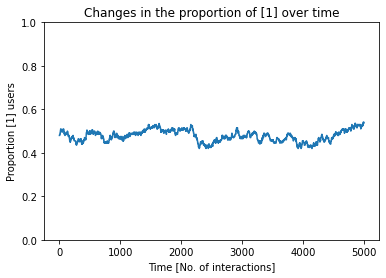

In [26]:
# Simulate 5000 interctions between 200 agents 
new_population, proportion = simulate(200, 5000)

# Make a plot of the changes in proportion of '1' over interactions 

%matplotlib inline 
#put plot in the notebook
import matplotlib.pyplot as plt # importing a plotting library
plt.plot(proportion)

# and add some details to the plot
plt.title('Changes in the proportion of [1] over time')
plt.ylabel('Proportion [1] users')
plt.xlabel('Time [No. of interactions]')
plt.ylim(0,1)

I'll need to conduct numerous simulations to acquire a clear picture of what's going on.

So, let's create a new function that does a large number of simulations at once:

In [30]:
# Create a function that runs s simulations of a community of size N interacting randomly for K times    

def batch_simulate(N,K,S):
    batch_proportions=[]
    for i in range(S):
        new_population, proportion = simulate(N, K)
        batch_proportions.append(proportion)
    return batch_proportions

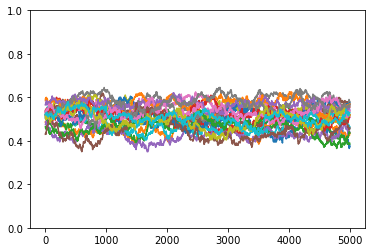

In [31]:
# Make 20 simulations of 5000 interctions between 200 agents 
results = batch_simulate(200,5000,20)

plt.ylim(0,1)

for i in results:
    plt.plot(i)

Perhaps you've realized that the trend isn't converging: even after 5000 encounters, the proportion of one variation is still around 0.5, indicating that both numbers are prevalent in the population and that there hasn't been a shift toward one number.

This is due to the fact that we begin with random populations in which some unflexible agents never change. We estimate that if there are at least two unflexible agents with distinct vowelsnumbers in the community, the flexible agents will continue to adapt to these separate unflexible agents, never attaining stability and convergence.

So we ask ourselves: under what circumstances might the community converge? How many unflexible people can a population have and yet have convergence?

To put this to the test, I will change the functions to generate biased populations in which I control the amount of unflexible agents:

In [52]:
# Modify the function to make populations of N agents with a given number of unflexible agents (un)

# Setting the parameters
numbers = ['1', '2']
qualities = ['Flexible', 'Unflexible']

def make_population_biased(N,UN):
    
    population = []
    
    for i in range(UN):
        
        r = random.randint(0,1)
        
        agent = make_agent(numbers[r], qualities[1])
        
        population.append(agent)
    
    for i in range(N-UN):
        
        r = random.randint(0,1)
        
        agent = make_agent(numbers[r], qualities[0])
        
        population.append(agent)
        print(agent)

    return population

# Modify the function so that it calls our biased population 

def simulate_biased(K, N, UN):  #un=no. of unflexible
    
    population = make_population_biased(N, UN)
    # print("Initial Population:", population)
    
    proportion = []
    
    for i in range(K):
        
        pair = choose_pair(population)
        
        interact(pair[0],pair[1])
        
        proportion.append(count(population))
    
    return population, proportion

In [60]:
print(population)

[['2', 'Flexible'], ['2', 'Unflexible'], ['1', 'Unflexible'], ['2', 'Flexible'], ['2', 'Unflexible']]


In [54]:
print(proportion)

[0.5004, 0.5004, 0.5004, 0.5004, 0.5004, 0.5004, 0.5006, 0.5006, 0.5006, 0.5008, 0.5008, 0.501, 0.5008, 0.5008, 0.5006, 0.5008, 0.5006, 0.5008, 0.5006, 0.5006, 0.5008, 0.5008, 0.501, 0.5012, 0.5012, 0.5014, 0.5012, 0.5012, 0.5012, 0.5014, 0.5014, 0.5016, 0.5014, 0.5014, 0.5014, 0.5012, 0.5014, 0.5014, 0.5014, 0.5014, 0.5014, 0.5016, 0.5016, 0.5016, 0.5018, 0.502, 0.502, 0.502, 0.5022, 0.5022, 0.502, 0.5018, 0.5018, 0.5018, 0.502, 0.502, 0.5022, 0.5022, 0.5024, 0.5022, 0.5024, 0.5024, 0.5024, 0.5026, 0.5026, 0.5028, 0.5026, 0.5028, 0.503, 0.5032, 0.5034, 0.5032, 0.5034, 0.5032, 0.503, 0.5032, 0.503, 0.5028, 0.5026, 0.5024, 0.5024, 0.5026, 0.5026, 0.5026, 0.5024, 0.5026, 0.5026, 0.5026, 0.5026, 0.5026, 0.5026, 0.5026, 0.5026, 0.5028, 0.5028, 0.5026, 0.5024, 0.5024, 0.5026, 0.5026, 0.5028, 0.503, 0.503, 0.503, 0.503, 0.503, 0.5032, 0.5034, 0.5036, 0.5034, 0.5032, 0.503, 0.503, 0.503, 0.5032, 0.503, 0.503, 0.503, 0.5028, 0.5028, 0.5026, 0.5026, 0.5028, 0.5028, 0.5028, 0.5028, 0.5028, 0.503

['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Fle

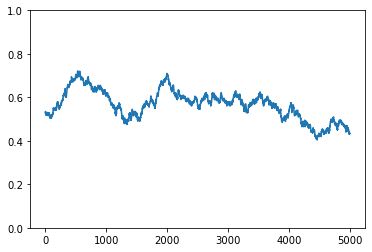

In [61]:
# Run a simulation in a community with no unflexible agents

new_population, proportion = simulate_biased(5000, 200, 0)
plt.ylim(0,1)
plt.plot(proportion)

['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Fle

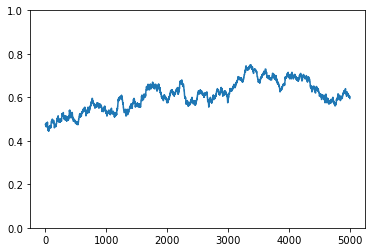

In [62]:
# Run a simulation in a community with 1 unflexible agents

new_population, proportion = simulate_biased(5000, 200, 1)
print('Changes in the proportion of [1] over time')
plt.ylim(0,1)
plt.plot(proportion)

['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Fle

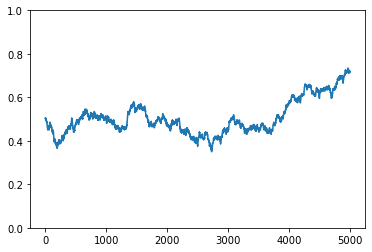

In [63]:
# Run a simulation in a community with 2 unflexible agents

new_population, proportion = simulate_biased(5000, 200, 2)
print('Changes in the proportion of [1] over time')
plt.ylim(0,1)
plt.plot(proportion)

Again, there is significant variation. So let's run these simulations several times, each time with a different proportion of obstinate people.

S simulations will be done for each potential proportion of unflexible persons. In this section, I will investigate what occurs when there are 0, 1, 2, 25%, 50%, and 100% unflexible agents in the population.

In [74]:
# Modify the function so it runs S simulations of each biased population

def batch_simulate_biased(N,K,S): #n-pop size, k=no. of interactions, s=no. of simulations for each bias
    
    all_results=[]
    
    possible_uns = [0, 1, 2, int(N / 4.), int(N / 2.), N]
    
    for possible_un in possible_uns:
        
        print(possible_un)
    
        current_results = []  # print the progress of the simulations 
    
        for i in range(S):

            new_population, proportion = simulate_biased(N, K, possible_un)
            current_results.append(proportion)
            
        all_results.append(current_results)
    
    return all_results

Now I can check how the proportion of unflexible agents affects convergence.

In [75]:
# Run 20 simulations of each stubborness proportions in a community of 200 agents 
results = batch_simulate_biased(5000,200,20)

0
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'F

['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Fle

['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Fle

['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Fle

['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Fle

['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Fle

['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Fle

['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Fle

['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Fle

['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Fle

['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Fle

['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Fle

['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Fle

['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Fle

['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Fle

['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['1', 'Flexible']
['2', 'Flexible']
['2', 'Flexible']
['1', 'Fle

1250
2500
5000


Text(0, 0.5, 'Proportion Individuals Using [1]')

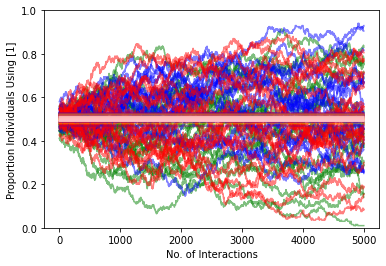

In [83]:
# Plot the results of the simulations 

colors = ['green', 'blue', 'red', 'purple', 'orange', 'pink']
for j, un in enumerate(results):
    for simulation in un:
        plt.plot(simulation, color = colors[j], alpha = .5)

plt.ylim(0,1)
plt.xlabel('No. of Interactions')
plt.ylabel('Proportion Individuals Using [1]')

What we see is that there are no clear patterns, except for when the population has 0-2 unflexible agents (in red, blue and green): in these cases, the population usually converges on one number. In all other cases, it's basically a mess.